<a href="https://colab.research.google.com/github/nasirudeenraheem/Nfts-sentiment-analysis/blob/main/Nfts_Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this Notebook we are going to be solving a Blockchain problem on Nfts using Twitter Sentiment Analysis.

**Introduction**

This rising cryptocurrency niche recorded over $23 billion in trading volumes as per the latest DappRadar report. Currently, NFT-related active wallets account for close to 50% of the total crypto industry usage, a statistic that will likely increase given the continued interest in 2022. 

Before jumping into the developments and prospects, it is worth understanding why NFTs are gaining traction across the board. Well, there are many factors behind the sudden surge but the most significant one is the indistinguishable nature of NFTs. Each NFT token has a unique value, making them a suitable on-chain asset to represent digital collectibles such as in-game items or off-chain assets like property and tokenized stocks. italicized text 

The Methodologies are:

#### Step 1

1. Generate Sentiment of each tweet using Text Blob

2. Statistical features

3. Time data features


#### Part 2

1. Exploratory data analysis with the data 

2. **Named Entity Recognition**

3. Word cloud of the data based on each sentiment

4. Top 10 words of each sentiment


#### Part 3

1. Using machine learning model to automate sentiment analysis in the future

2. Feature extraction using Tf-idf

3. comparison of various machine learning model.

4. Lime to interpret the text

In [46]:
#!pip install lime #import lime

### Data Analysis and NLP libabiries

In [47]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style,rcParams
style.use('seaborn-white')
import warnings
warnings.filterwarnings('ignore')
import re
%matplotlib inline

In [48]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download('stopwords')
nltk.download('wordnet')
import wordcloud
from wordcloud import WordCloud
import string

import itertools
import collections
from collections import Counter

import nltk
#import contractions
import re

## For Entity Recognition
import spacy

## for feature extraction

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [49]:
nlp = spacy.load("en_core_web_sm") # laod spacy model

In [50]:
import textblob # for sentiment the text

### For machine learning

In [51]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
## machine learning libary
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_recall_fscore_support
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.linear_model import LogisticRegression, RidgeClassifier


# importing the libraries
import lime
import sklearn.ensemble
from __future__ import print_function
from lime import lime_text
from sklearn.pipeline import make_pipeline
from lime.lime_text import LimeTextExplainer


#### Helper function for data analysis

In [52]:
### Helper fucntion for data analysis
def without_hue(plot, feature):
    total = len(feature)
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y), size = 12)
    plt.show()
    
    
def with_hue(plot, feature, Number_of_categories, hue_categories):
    a = [p.get_height() for p in plot.patches]
    patch = [p for p in plot.patches]
    for i in range(Number_of_categories):
        total = feature.value_counts().values[i]
        for j in range(hue_categories):
            percentage = '{:.1f}%'.format(100 * a[(j*Number_of_categories + i)]/total)
            x = patch[(j*Number_of_categories + i)].get_x() + patch[(j*Number_of_categories + i)].get_width() / 2 - 0.15
            y = patch[(j*Number_of_categories + i)].get_y() + patch[(j*Number_of_categories + i)].get_height() 
            ax.annotate(percentage, (x, y), size = 12)
    plt.show()

In [53]:
df = pd.read_csv('nftdata.csv')

In [54]:
df = df.drop(['place', 'time'], axis=1)

In [55]:
df.head()

date         username  \
0  2022-03-05  wizardsofetheen   
1  2022-03-05         hashook_   
2  2022-03-05     megaheadsnft   
3  2022-03-05        dicoslabs   
4  2022-03-05  otegbeyeboluwa1   

                                               tweet language  \
0  🚨🚨🚨  Introducing our second 1/1 wizard reveal....       en   
1  Hi I'm "Tiger" from AniBots collection🐅 You ca...       en   
2  Discord open y'all 🙌☁️🌈.   https://t.co/BGPGhy...       en   
3  'soldier 022' is now listed for 0.07Eth on the...       en   
4  Giving out free GENTLEAPE NFT today   Follow a...       en   

                                            hashtags  likes_count  
0  ['foretheen', 'nft', 'nfts', 'nftdrop', 'nftco...           21  
1  ['nft', 'nftcommunity', 'nftcollector', 'nftar...            7  
2                    ['nft', 'nfts', 'nftcommunity']            3  
3  ['opensea', 'nft', 'nfts', 'nftartist', 'nftco...            7  
4  ['nfts', 'nftgiveaway', 'nftcommunity', 'nftsh...            8

In [56]:
print('we have {} rows in our data set'.format(df.shape[0]))
print('we have {} columns in our data set'.format(df.shape[1]))

we have 1223 rows in our data set
we have 6 columns in our data set


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1223 entries, 0 to 1222
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   date         1223 non-null   object
 1   username     1223 non-null   object
 2   tweet        1223 non-null   object
 3   language     1223 non-null   object
 4   hashtags     1223 non-null   object
 5   likes_count  1223 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 57.5+ KB


#### Sentiment analysis on each tweet

In [58]:
df_sentiment_features = df['tweet'].apply(lambda row: textblob.TextBlob(row).sentiment)
df['Polarity'] = [obj.polarity for obj in df_sentiment_features.values]
df['Subjectivity'] = [obj.subjectivity for obj in df_sentiment_features.values]

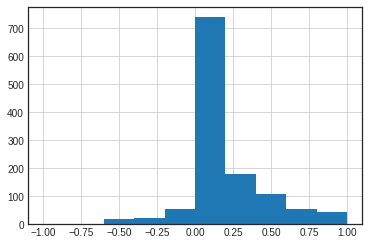

In [59]:
# check the distribution of the polarity score
df['Polarity'].hist()

Most tweet have polarity score of 0.0 which means they have neutral sentiment to nfts.
The following polarity score will be used to label our data sentiment to positive, negative and neutral sentiment for further analysis.

In [60]:
def sentiment(x):
    if x > 0:
        return "positive"
    elif x < 0:
        return "negative"
    else:
        return "neutral"

In [61]:
df['sentiment'] = df['Polarity'].apply(sentiment)

### Generating statitsical features

Most features like len count, character count and density will be calculated using tweets.

In [62]:
df['word_count'] = df['tweet'].apply(lambda x : len(x.split()))
df['char_count'] = df['tweet'].apply(lambda x : len(x.replace(" ","")))
df['word_density'] = df['word_count'] / (df['char_count'] + 1)

### Date_Features

The date features is used to scrap the data from twitter with the range of March 4 - March 18.

The features to be used will be day and day of week

In [63]:
df['dayofweek'] = pd.to_datetime(df['date']).dt.dayofweek
df['day'] = pd.to_datetime(df['date']).dt.day

In [64]:
df.head()

date         username  \
0  2022-03-05  wizardsofetheen   
1  2022-03-05         hashook_   
2  2022-03-05     megaheadsnft   
3  2022-03-05        dicoslabs   
4  2022-03-05  otegbeyeboluwa1   

                                               tweet language  \
0  🚨🚨🚨  Introducing our second 1/1 wizard reveal....       en   
1  Hi I'm "Tiger" from AniBots collection🐅 You ca...       en   
2  Discord open y'all 🙌☁️🌈.   https://t.co/BGPGhy...       en   
3  'soldier 022' is now listed for 0.07Eth on the...       en   
4  Giving out free GENTLEAPE NFT today   Follow a...       en   

                                            hashtags  likes_count  Polarity  \
0  ['foretheen', 'nft', 'nfts', 'nftdrop', 'nftco...           21  0.433333   
1  ['nft', 'nftcommunity', 'nftcollector', 'nftar...            7 -0.156250   
2                    ['nft', 'nfts', 'nftcommunity']            3  0.000000   
3  ['opensea', 'nft', 'nfts', 'nftartist', 'nftco...            7  0.000000   
4  ['nfts', 'nftgiveaway', 'nftcommunity', 'nftsh...            8  0.400000   

   Subjectivity sentiment  word_count  char_count  word_density  dayofweek  \
0      0.416667  positive          40         254      0.156863          5   
1      0.375000  negative          37         228      0.161572          5   
2      0.500000   neutral           9          89      0.100000          5   
3      0.000000   neutral          20         126      0.157480          5   
4      0.800000  positive          17         142      0.118881          5   

   day  
0    5  
1    5  
2    5  
3    5  
4    5

### Exploratory Data Analysis

In this section we are going to be doing Uni-variate and bivariate analysis to answer the following questions:
    
1. The percentage of each sentiment in the data

2. Top 10 most occuring word count and character count in the data

3. The 10 Likes count in the data

4. The percentage of days of the week

5. Average Likes counts for each sentiment

6. Sentiment with total number of word and character count

7. Days of week with Sentiment percentage

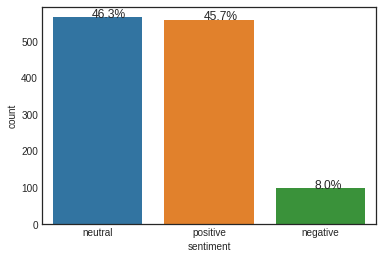

In [65]:
ax = sns.countplot(x='sentiment', data=df, order = df['sentiment'].value_counts().index)
without_hue(ax, df['sentiment'])

We have 46.3% of Sentiment to be **Neutral**, 45.7% **Positive** and 8.0% **Negative**.

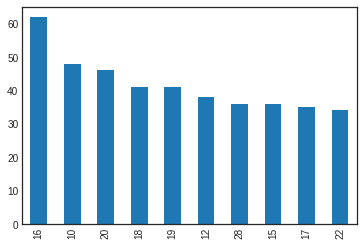

In [66]:
df['word_count'].value_counts()[:10].plot(kind='bar')

In [67]:
df['word_count'].max()

53

The Top 10 most occuring word count is from 10 words to 28 words.

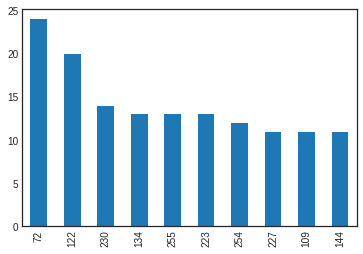

In [68]:
df['char_count'].value_counts()[:10].plot(kind='bar')

In [69]:
df['char_count'].max()

270

The top 10 character word count from 72-255.

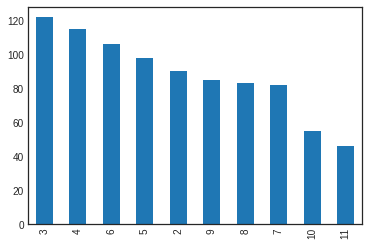

In [70]:
df['likes_count'].value_counts()[:10].plot(kind='bar')

In [71]:
df['likes_count'].max()

3121

The top 10 likes count are from 2-11 counts.

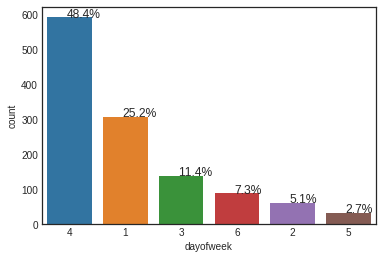

In [72]:
ax = sns.countplot(x='dayofweek', data=df, order = df['dayofweek'].value_counts().index)
without_hue(ax, df['dayofweek'])

Most Tweet are made on day of week 4 (Friday) with 48.4% and less tweet on 5 (Saturday) with 2.7%.

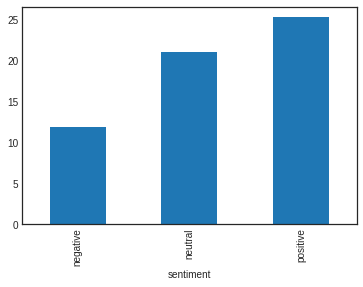

In [73]:
df.groupby('sentiment')['likes_count'].mean().plot(kind='bar')

Positive sentiment with the Highest average number of likes for the tweets.

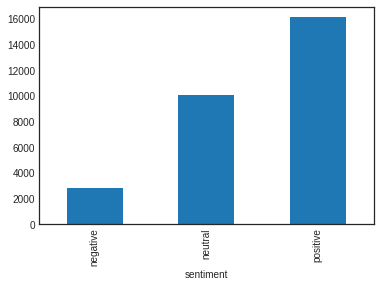

In [74]:
df.groupby('sentiment')['word_count'].sum().plot(kind='bar')

Positive sentiment with the Highest number of word counts for the tweets.

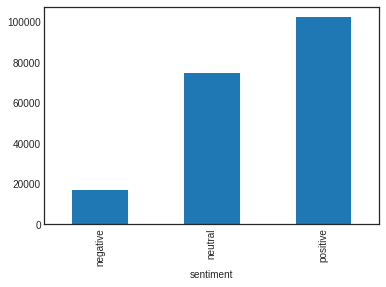

In [75]:
df.groupby('sentiment')['char_count'].sum().plot(kind='bar')

Positive sentiment with the Highest number of Character counts for the tweets.

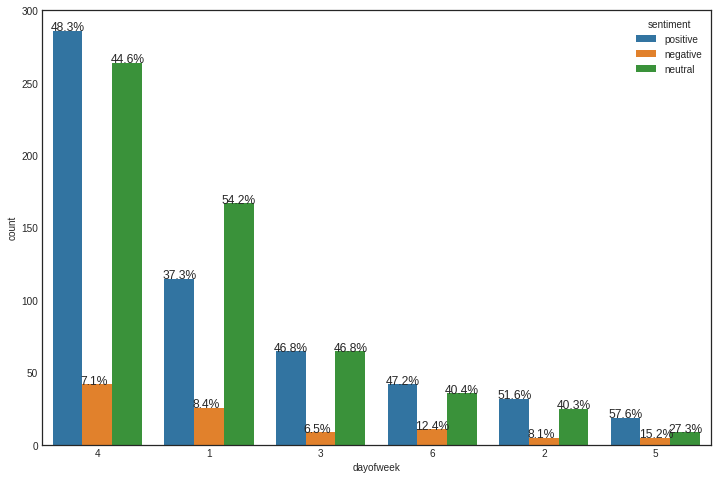

In [76]:
plt.figure(figsize=(12,8))
ax = sns.countplot(x='dayofweek', data=df,hue='sentiment', order = df['dayofweek'].value_counts().index)
with_hue(ax, df['dayofweek'],df['dayofweek'].nunique(), df['sentiment'].nunique())

On Friday we have more Positive sentiment with 48.3%.

On Tuesday we have more Neutral sentiment with 54.2%.

On Saturday we have 15.2% of negative sentiment, which is the highest percentage for negative sentiment across the days of week.

### Named Entity Recognition

In this section we are going to be exploring top 5 tweet with most likes.

In [85]:
df['likes_count'].nlargest()

1097    3121
1001    1489
456     1180
226     1089
208      970
Name: likes_count, dtype: int64

Top 5 tweet with most likes count on nfts.

In [107]:
tweet_1 = df[df['likes_count'] == 3121]['tweet'].to_list()
tweet_2 = df[df['likes_count'] == 1489]['tweet'].to_list()
tweet_3 = df[df['likes_count'] == 1180]['tweet'].to_list()
tweet_4 = df[df['likes_count'] == 1089]['tweet'].to_list()
tweet_5 = df[df['likes_count'] == 970]['tweet'].to_list()

### tweet number 1

In [117]:
print(tweet_1[0])

Something big is coming 👀  All engagement with this tweet will be used as an entry for WL!  500 retweets and we will reveal more 👀 #NFTs   #NFTCommunity  https://t.co/B74AFRJuxR


In [100]:
doc1 = nlp(tweet_1[0])

In [101]:
for ent in doc1.ents:
    print(ent.text, ent.label_)

WL ORG
500 CARDINAL


In [106]:
from spacy import displacy
displacy.render(doc1, style="ent",jupyter=True)

We observe that an Organization WL is an important factors for nfts growth on twitter. we can be more curious about what is **WL**

#### tweet number 2

In [111]:
tweet_2[0]

'Swag ✅🔥  2 Whitelist giveaways!  To enter the giveaway, you must make sure you:  1⃣Follow @raccoonsislenft 2⃣♥️, RT, tag 3 friends 3⃣ Join  https://t.co/kIz0OkWZtU &amp; say hello~  Result in 24 hours!  #NFTs #nftdrop #NFTCommunity #NFTGiveaways  https://t.co/YaovAY1VpH'

In [112]:
doc2 = nlp(tweet_2[0])

In [113]:
for ent in doc2.ents:
    print(ent.text, ent.label_)
from spacy import displacy
displacy.render(doc2, style="ent",jupyter=True)

Swag ✅ PERSON
2 CARDINAL
3 CARDINAL
3⃣ CARDINAL
https://t.co/kIz0OkWZtU CARDINAL
hello~ CARDINAL
Result PRODUCT
24 hours TIME
#NFTs MONEY
#nftdrop #NFTCommunity #NFTGiveaways MONEY


The tweet has a very high traffic when there is a lot of gifts **Swag** and fast results in **24 hours** Time.

### tweet number 3

In [114]:
tweet_3[0]

'Giveaway with @ChubbeezNFT  10x WL opportunity  👉 Follow  @ChubbeezNFT  👉 Like + RT 👉 Tag 2 Friends 👉 Join their Discord:  https://t.co/hMP7kqL1PC  First 10 to say " Here from Twitter " will also get WL  Ends in 24Hrs ⏳ #nft #NFTCommunity #nfts #Whitelist #ETH  #chubbeez  https://t.co/PteVWkWxdM'

In [115]:
doc3 = nlp(tweet_3[0])

In [116]:
for ent in doc3.ents:
    print(ent.text, ent.label_)
from spacy import displacy
displacy.render(doc3, style="ent",jupyter=True)

Giveaway PERSON
10x DATE
WL ORG
Tag 2 PRODUCT
Discord GPE
10 CARDINAL
#NFTCommunity #nfts #Whitelist MONEY
ETH PERSON
#chubbeez MONEY


The name entity did not capture **WL** but it is having an high impact on tweet are likes. This also have likes with influence of time **24 hours**

### tweet number 4

In [118]:
tweet_4[0]

'🔥100$ #Giveaway 🔥  Follow @BadApeBitchClub  Tag 2 Friends  Change your profile picture to👇  #NFTGiveaway #NFTCommunity #NFTGiveaways #Giveaways #NFTdrop #NFTProject #NFT #NFTs #nftcollector #NFTsales #nftnews #Giveaways #CryptoGiveaways #Ethereum #eth #GEM #100x  https://t.co/ghJaWkOG9Q'

In [119]:
doc4 = nlp(tweet_4[0])

In [120]:
for ent in doc4.ents:
    print(ent.text, ent.label_)
from spacy import displacy
displacy.render(doc4, style="ent",jupyter=True)

100$ #Giveaway MONEY
👇 CARDINAL
#NFTGiveaway #NFTCommunity #NFTGiveaways #Giveaways #NFTdrop #NFTProject # MONEY
#nftcollector #NFTsales MONEY
#Giveaways #CryptoGiveaways MONEY
#GEM MONEY
100x MONEY


Etherum blockchain and 100x drives the tweet.

### tweet number 5

In [121]:
tweet_5[0]

'🎁 GIVEAWAY 🎁  @Beeyonders are giving away: 10 OG Spots, 1 NFT &amp; $500 in $ETH  To enter: • Like &amp; RT • Follow: @Beeyonders • Tag A Friend (1 Tag = 1 Entry)  ⏰ 2 DAYS!   #NFTGiveaways #NFTDrop #AD #NFTCommunity #NFTPromotion #NFTProject #NFT #NFTs #nftart  https://t.co/iBTQhwu9oC'

In [122]:
doc5 = nlp(tweet_5[0])

In [123]:
for ent in doc5.ents:
    print(ent.text, ent.label_)
from spacy import displacy
displacy.render(doc5, style="ent",jupyter=True)

10 CARDINAL
OG Spots ORG
1 CARDINAL
NFT &amp ORG
500 MONEY
ETH PERSON
1 Tag CARDINAL
1 CARDINAL
2 CARDINAL
#NFTGiveaways # MONEY
#NFTCommunity #NFTPromotion #NFTProject # MONEY


### For futher analysis


we are going to pre-process our data 

In [37]:
# remove some stopwords to capture negation in n-grams if possible
stop_words = nltk.corpus.stopwords.words('english')
stop_words.remove('no')
stop_words.remove('not')
stop_words.remove('your')

# load up a for wordnet
wnl = nltk.stem.WordNetLemmatizer()

def simple_text_preprocessor(document): 
    # lower case
    document = str(document).lower()
    
    # remove unnecessary characters
    document = re.sub(r'[^a-zA-Z]',r' ', document)
    document = re.sub('[0-9]+', '', document)
    document = re.sub(' +', ' ', document)
    document = re.sub('((www.[^s]+)|(https?://[^s]+))',' ',document)
    document = re.sub(r'(.)1+', r'1', document)
    document = re.sub(r'http', r' ', document)
    document = re.sub(r'nft [a-z]\w+', r' ', document)
    
    # simple porter stemming
    document = ' '.join([wnl.lemmatize(word) for word in document.split()])
    
    # stopwords removal
    document = ' '.join([word for word in document.split() if word not in stop_words])
    
    return document

clean_text = np.vectorize(simple_text_preprocessor)

In [38]:
df['tweet_clean'] = clean_text(df['tweet'].values)

In [39]:
df.head()

date         username  \
0  2022-03-05  wizardsofetheen   
1  2022-03-05         hashook_   
2  2022-03-05     megaheadsnft   
3  2022-03-05        dicoslabs   
4  2022-03-05  otegbeyeboluwa1   

                                               tweet language  \
0  🚨🚨🚨  Introducing our second 1/1 wizard reveal....       en   
1  Hi I'm "Tiger" from AniBots collection🐅 You ca...       en   
2  Discord open y'all 🙌☁️🌈.   https://t.co/BGPGhy...       en   
3  'soldier 022' is now listed for 0.07Eth on the...       en   
4  Giving out free GENTLEAPE NFT today   Follow a...       en   

                                            hashtags  likes_count  Polarity  \
0  ['foretheen', 'nft', 'nfts', 'nftdrop', 'nftco...           21  0.433333   
1  ['nft', 'nftcommunity', 'nftcollector', 'nftar...            7 -0.156250   
2                    ['nft', 'nfts', 'nftcommunity']            3  0.000000   
3  ['opensea', 'nft', 'nfts', 'nftartist', 'nftco...            7  0.000000   
4  ['nfts', 'nftgiveaway', 'nftcommunity', 'nftsh...            8  0.400000   

   Subjectivity sentiment  word_count  char_count  word_density  dayofweek  \
0      0.416667  positive          40         254      0.156863          5   
1      0.375000  negative          37         228      0.161572          5   
2      0.500000   neutral           9          89      0.100000          5   
3      0.000000   neutral          20         126      0.157480          5   
4      0.800000  positive          17         142      0.118881          5   

   day                                        tweet_clean  
0    5  introducing second wizard reveal meet turgen p...  
1    5  hi tiger anibots collection find opensea disco...  
2    5  discord open co bgpghyveea nftcommunity co rlg...  
3    5  soldier listed eth polygon network opensea co ...  
4    5  giving free gentleape follow like nfts nftgive...

In [40]:
df['tweet_clean'][4]

'giving free gentleape follow like nfts nftgiveaway nftcommunity nftshill boredapeyachtclub gentleape xgem co drhrhyuh'

### Word cloud analysis

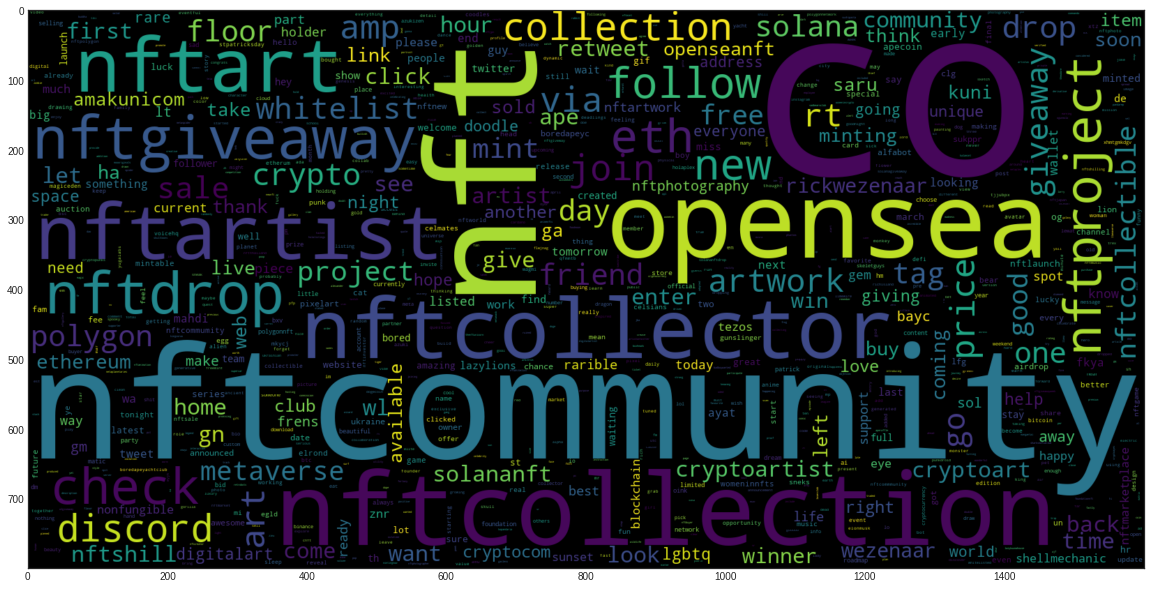

In [41]:
data_word = df['tweet_clean']
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(data_word))
plt.imshow(wc,interpolation='bilinear')

## WORD CLOUD ON EACH SENTIMENT

In [42]:
data_positive = df[df['sentiment'] == 'positive'].reset_index(drop=True)

data_neutral = df[df['sentiment'] == 'neutral'].reset_index(drop=True)

data_negative = df[df['sentiment'] == 'negative'].reset_index(drop=True)


## Positive word

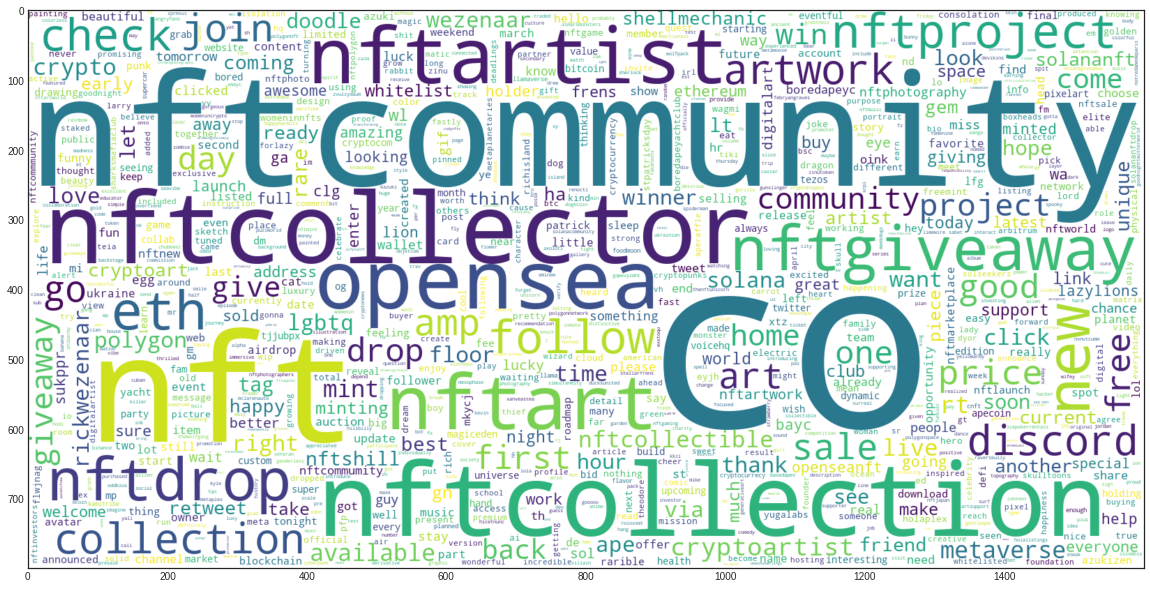

In [43]:
data_word_positive = data_positive['tweet_clean']
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,background_color="white",
               collocations=False).generate(" ".join(data_word_positive))
plt.imshow(wc, interpolation='bilinear')

### Word cloud on netral sentiment

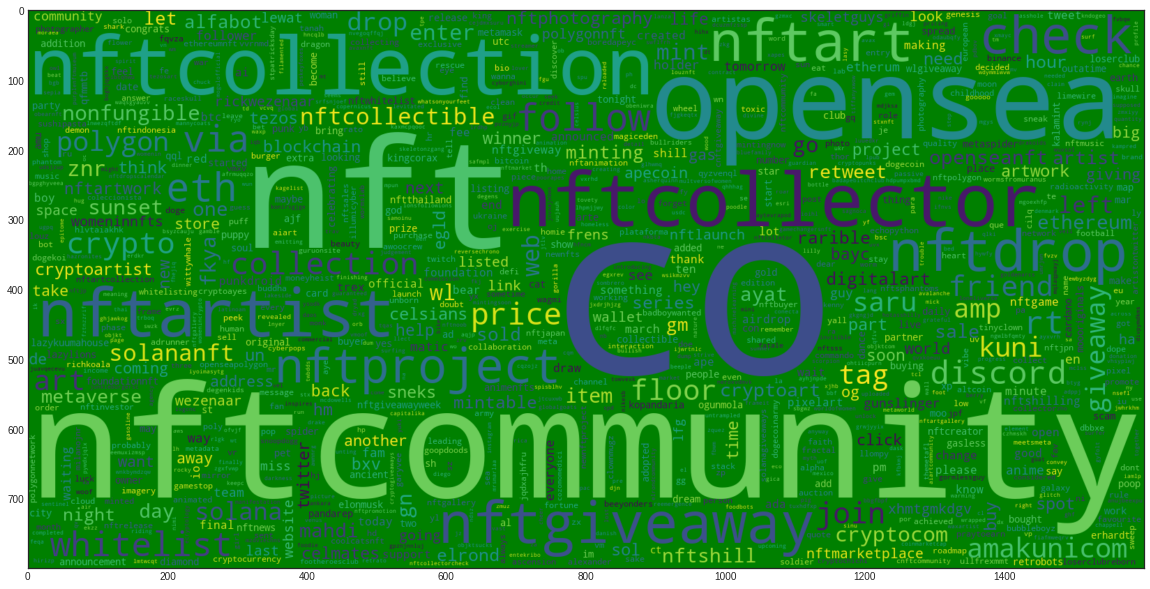

In [44]:
data_word_neutral = data_neutral['tweet_clean']
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,background_color="green",
               collocations=False).generate(" ".join(data_word_neutral))
plt.imshow(wc,interpolation='bilinear')

### Word cloud oon Negative sentiment

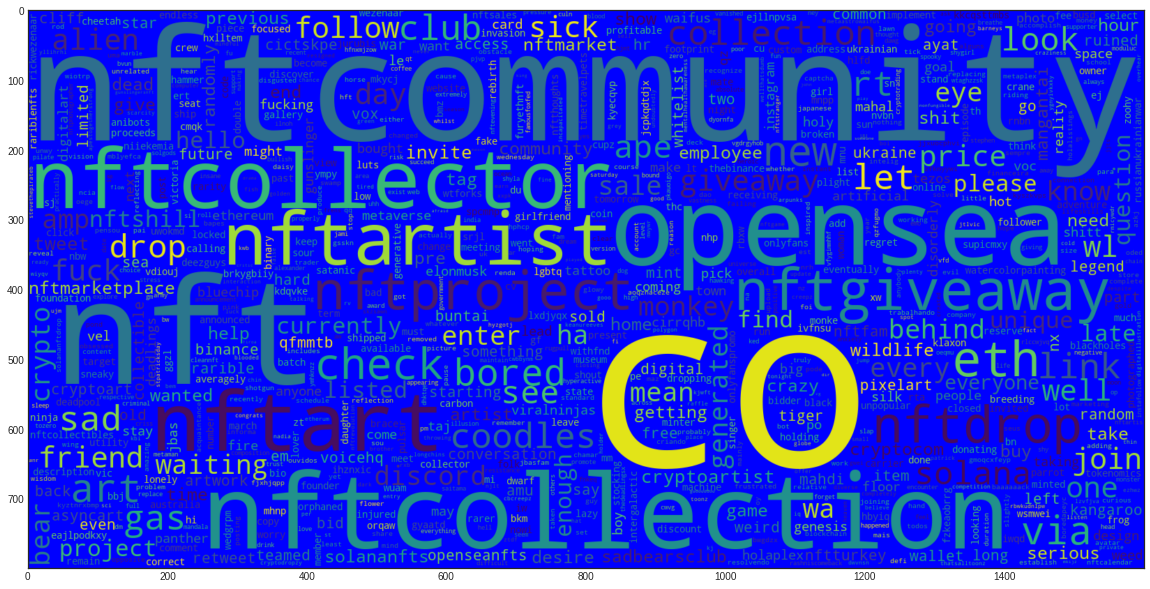

In [45]:
data_word_negative = data_negative['tweet_clean']
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,background_color="blue",
               collocations=False).generate(" ".join(data_word_negative))
plt.imshow(wc,interpolation='bilinear')

### Transforming the data for machine learning phase

In [ ]:
df.columns

Index(['date', 'username', 'tweet', 'language', 'hashtags', 'likes_count',
       'Polarity', 'Subjectivity', 'sentiment', 'word_count', 'char_count',
       'word_density', 'dayofweek', 'day', 'tweet_clean'],
      dtype='object')

In [ ]:
data = df[['tweet_clean', 'word_count', 'char_count','word_density', 'sentiment']]

In [ ]:
data.head()

tweet_clean  word_count  char_count  \
0  introducing second wizard reveal meet turgen p...          40         254   
1  hi tiger anibots collection find opensea disco...          37         228   
2  discord open co bgpghyveea nftcommunity co rlg...           9          89   
3  soldier listed eth polygon network opensea co ...          20         126   
4  giving free gentleape follow like nfts nftgive...          17         142   

   word_density sentiment  
0      0.156863  positive  
1      0.161572  negative  
2      0.100000   neutral  
3      0.157480   neutral  
4      0.118881  positive

In [ ]:
## cleaning the sentiment
data['sentiment'] = data['sentiment'].map({'positive':2, 'neutral':1, 'negative':0})

### Split the data to train and test

In [ ]:
X=data.drop('sentiment', axis=1)
y=data['sentiment']

In [ ]:
# Separating the 80% data for training data and 20% for testing data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state =2021, stratify=y)

In [ ]:
print('Shape of the X_train {}'.format(X_train.shape))
print('Shape of the y_train {}'.format(y_train.shape))
print('Shape of the X_test {}'.format(X_test.shape))
print('Shape of the y_test {}'.format(y_test.shape))

Shape of the X_train (978, 4)
Shape of the y_train (978,)
Shape of the X_test (245, 4)
Shape of the y_test (245,)


In [ ]:
tvidf = TfidfVectorizer(min_df=0.0, max_df=1.0, ngram_range=(1,1)) # using tfidf for text vectorizer

In [ ]:
tfidf = tvidf.fit(X_train['tweet_clean']) # fitting on the train

In [ ]:
train_tfidf = tfidf.transform(X_train['tweet_clean']).toarray()
train_tfidf = pd.DataFrame(train_tfidf ,columns=tvidf.get_feature_names())

In [ ]:
test_tfidf = tfidf.transform(X_test['tweet_clean']).toarray()
test_tfidf = pd.DataFrame(test_tfidf ,columns=tvidf.get_feature_names())

In [ ]:
print(train_tfidf.shape)
print(y_train.shape)

(978, 4788)
(978,)


In [ ]:
print(test_tfidf.shape)
print(y_test.shape)

(245, 4788)
(245,)


In [ ]:
algos = [LogisticRegression(), 
        RandomForestClassifier(max_depth=5,n_estimators=1000, max_features='auto', class_weight='balanced'),
        DecisionTreeClassifier(max_depth=5),
        LGBMClassifier(n_estimators=500),
         XGBClassifier(max_depth=4, n_estimators=500)]

names = ['Logistic_Regression',  'RandomForest','Decision_Tree', 'Lightgbm', 'Xgboost']
accuracy_list = []

In [ ]:
for name in algos:
    model = name
    model.fit(train_tfidf,y_train)
    y_pred = model.predict(test_tfidf)
    accuracy= accuracy_score(y_test,y_pred)
    accuracy_list.append(accuracy)

In [ ]:
evaluation = pd.DataFrame({'Model': names,
                           'Accuracy_Score': accuracy_list})

In [ ]:
evaluation.sort_values(by='Accuracy_Score', ascending=False)

Model  Accuracy_Score
4              Xgboost        0.751020
0  Logistic_Regression        0.746939
3             Lightgbm        0.685714
1         RandomForest        0.661224
2        Decision_Tree        0.600000

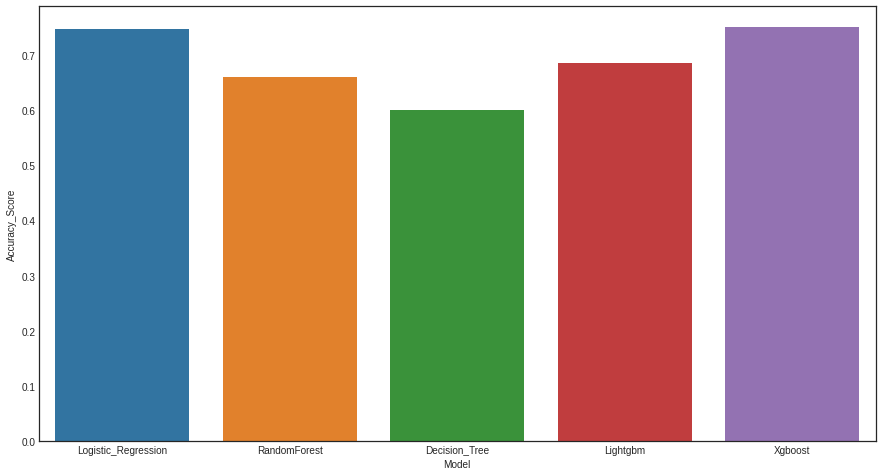

In [ ]:
rcParams['figure.figsize'] = 15,8
sns.barplot(data=evaluation,x='Model', y='Accuracy_Score')

### Model explainablity

In [ ]:
# converting the vectoriser and model into a pipeline
# this is necessary as LIME takes a model pipeline as an input
c = make_pipeline(tfidf, algos[0])

# saving a list of strings version of the X_test object
ls_X_test= list(X_test['tweet_clean'])

# saving the class names in a dictionary to increase interpretability
class_names = {2:'positive', 1:'neutral', 0:'negative'}

In [ ]:
# create the LIME explainer
# add the class names for interpretability
LIME_explainer = LimeTextExplainer(class_names=class_names)

# choose a random single prediction
idx = 98
# explain the chosen prediction 
# use the probability results of the logistic regression
# can also add num_features parameter to reduce the number of features explained
LIME_exp = LIME_explainer.explain_instance(ls_X_test[idx], c.predict_proba)
# print results
print('Document id: %d' % idx)
print('Tweet: ', ls_X_test[idx])
print('Sentiment probability =', c.predict_proba([ls_X_test[idx]]).round(3)[0,1])
print('True class: %s' % class_names.get(list(y_test)[idx]))

Document id: 98
Tweet:  winner umutmutlubal co lrivojmz j follow latest project amp giveaway nfts giveaway nftcollectibles nftcollector nftgiveaways nftcommunity nftartist nftprojects
Sentiment probability = 0.262
True class: positive


In [ ]:
# show the explainability results with highlighted text
print("2 = positive, 1 = neutral, 0 = negative")
LIME_exp.show_in_notebook(text=True)

2 = positive, 1 = neutral, 0 = negative
